  # Amazon Beauty Help Chatbot

### by Reina Alvarez 

### Introduction

The dataset you qa_Beauty.json, is part of the Amazon Question and Answer (QA) dataset. This specific subset focuses on the Beauty category of products on Amazon. 

Here's a brief overview of what it contains:

Questions:      These are questions posted by customers regarding various beauty products on Amazon.

Answers: These are responses provided by other customers or the product's seller to the questions posted.

The dataset aims to help in understanding customer inquiries and the corresponding answers for beauty products. I will use the dataset to build a Chatbot of  Q&A systems and sentiment analysis, to help understand customer questions and concerns. 


#### This is where you can find the data set: 

NLP topics used: removing stopwords, NER, stemming, lemmatization, WordCloud

#### Dataset URL https://jmcauley.ucsd.edu/data/amazon/qa/

### Lets import Libraries

In [1]:
# import the data science libraries
import numpy as np
import pandas as pd
import string
import ast

# import the scikit-learn libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification

# import the  NLP libraries

from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter 
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

import re

from datetime import date
from datetime import datetime

from wordcloud import WordCloud

import spacy
from spacy import displacy

#download NLTK Data 
nltk.download('punkt')
nltk.download('wordnet') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\reina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading our Data Set 

In [3]:
questions = []
answers = []

In [4]:
with open ('dataset\qa_Beauty.json','r') as f:
    for line in f:
        data =ast.literal_eval (line)
        questions.append(data['question'].lower())
        answers.append (data['answer'].lower())

### Lets Explore Data Set 

In [5]:
df = pd.DataFrame(answers, questions)

In [6]:
df.head(20)

,0
can you fit make up brushes in the trays,"yes it comes with adjustable dividers, you can..."
can you move all the dividers?,"yes,all the provided dividers are adjustable"
is the surface in side the smooth?,yes
how deep do the extending trays measure?,"hi there, not too deep. maybe like an inch dee..."
can bottles of nail polish stand upright in the top trays when the case is closed?,no. we just tried it and it won't.
what are the weight?,light box. carry it anywhere.
what are the dimensions?,i'm not sure but it ia good quality.
what are the tray size dimensions please? height - width - depth (how deep is the tray please). i need to know how deep the trays are because i have some taller items that i'd like to store in the case. it isn't stated. thank you.,there are 4 trays when the box is open wide. t...
how can i get a product manual copy or electronic copy,good
i have used the pe-901p. how does the d-901p compare?,thanks for your question. they are same item. ...


In [7]:
df.tail()

,0
"i find myself with rough cuticles right around the nail, should i use argan oil and how?","yes, you can. in the evening before you go to ..."
is it good for nail beauty?,i would say it's good for cuticles. i can't sa...
how can i use it for topical use on dry hair?,"a little goes a long way! a drop or two, depen..."
how can i use it for in-shower application?,application during shower takes less time. aft...
how can i use it for deep conditioning session?,"you can use it as a pre-shampoo treatment, whe..."


In [8]:
print(df.describe())

            0
count   42422
unique  34006
top       yes
freq      909


### Clean Text 

In [10]:
def clean_text(text): 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = ' '.join(text.split())
    return text

In [11]:
cleaned_questions = [clean_text (questions) for questions in questions]
cleaned_answers = [clean_text(answer) for answer in answers]
df = pd.DataFrame({'Question': cleaned_questions, 'Answer': cleaned_answers})
print(df.head(10))

                                            Question  \
0           can you fit make up brushes in the trays   
1                      can you move all the dividers   
2                  is the surface in side the smooth   
3            how deep do the extending trays measure   
4  can bottles of nail polish stand upright in th...   
5                                what are the weight   
6                            what are the dimensions   
7  what are the tray size dimensions please heigh...   
8  how can i get a product manual copy or electro...   
9  i have used the pe901p how does the d901p compare   

                                              Answer  
0  yes it comes with adjustable dividers you can ...  
1        yesall the provided dividers are adjustable  
2                                                yes  
3  hi there not too deep maybe like an inch deep ...  
4                    no we just tried it and it wont  
5                        light box carry it anywhere 

### Developing the Model


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Initialize TfidVetorizer 
vectorizer= TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(cleaned_questions)

In [23]:
# Create a DataFrame with the text content
df = pd.DataFrame({'Text': answers})

# Prepare stop words and tokenization function
stop_words = set(stopwords.words('english'))

def remove_stop_words(line): 
    words = word_tokenize(line) 
    filtered_words = [word for word in words if word.lower() not in stop_words] 
    return ' '.join(filtered_words)

# Apply function to DataFrame
df['Filtered_Text'] = df['Text'].apply(remove_stop_words)

print(df.head(10))


                                                Text  \
0  yes it comes with adjustable dividers, you can...   
1       yes,all the provided dividers are adjustable   
2                                                yes   
3  hi there, not too deep. maybe like an inch dee...   
4                 no. we just tried it and it won't.   
5                      light box. carry it anywhere.   
6               i'm not sure but it ia good quality.   
7  there are 4 trays when the box is open wide. t...   
8                                               good   
9  thanks for your question. they are same item. ...   

                                       Filtered_Text  
0  yes comes adjustable dividers , place dividers...  
1                 yes , provided dividers adjustable  
2                                                yes  
3  hi , deep . maybe like inch deep 2 inches wide...  
4                                   . tried wo n't .  
5                       light box . carry anywhere . 

### Lets build the Chatbot Conversation Function:

In [12]:
def conversation(im):
    Y_tfidf = vectorizer.transform(im)
    cosine_similarities = cosine_similarity(Y_tfidf, X_tfidf)
    highest_similarity_index = np.argmax(cosine_similarities, axis=1)[0]
    highest_similarity_score = cosine_similarities[0, highest_similarity_index]
    # Set a threshold for similarity 
    if highest_similarity_score < 0.4:
        return 'Sorry, I did not quite understand that' 
    else: 
        return answers[highest_similarity_index]

In [13]:
def main():
    usr = input ("Enter your name: ")
    print ('Support: Hi, welcome to Q&A support. How can I help you ? ')
    while True:
        #we are just reading the question from the user
        im=input("{}: ".format(usr))
        if im.lower() == 'bye':
            print ("Q&A support : bye !")
            break
        else:
            #call the function providing it with the im message
            print ("Q&A support: " + conversation ([im]) )    

In [ ]:
if __name__ == "__main__":
    main()

###  Results of Chatbot

Based on the responses provided by the chatbot, here are some observations and conclusions:

•	Information Accuracy and Detail:
The chatbot provides accurate and detailed responses, such as confirming the presence of sulfates in the shampoo ("sodium laureth sulfate") and explaining product characteristics and user experiences.

•	Product Knowledge and Clarity:
The chatbot offers clear answers about product characteristics and the effects of using a product as directed.

•	Utility and User Support:
The chatbot provides practical advice and guidance, such as using an eye cream under moisturizer and recommending a good moisturizer for dry skin.

#### Opportunities for Improvement:
•	Consistency and Formatting:
Improving the consistency and formatting of responses could enhance readability and professionalism.

•	Reducing Informality:
Reducing informal language and typographical errors could make the chatbot appear more polished and trustworthy.

•	User-Specific Recommendations:
Tailoring responses to specific user preferences or needs could increase user satisfaction and engagement.

Overall, the chatbot demonstrates a good understanding of the product-related queries and provides useful information, but there are opportunities to refine the language and personalize the interaction further. 



### NLP technique: removing stopwords

In [24]:

# Combine all text into a single string
all_text = ' '.join(df['Text'])

# Tokenize text into words
words = re.findall(r'\w+', all_text.lower())  # Extract words

# Get NLTK English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from words list
custom_stop_words = set(stop_words).union({'yes', 'use', 'one', 'would', 'like', 'used','get','good','know','hope','2',
                                        'sure','think', 'also', 'using','1'})

filtered_words = [word for word in words if word not in custom_stop_words]

# Count word frequency
word_counts = Counter(filtered_words)

# Get top 10 most frequent words
top_10_words = word_counts.most_common(10)

# Display top 10 words
print(top_10_words)

[('hair', 10734), ('product', 5618), ('skin', 4459), ('color', 3408), ('oil', 2565), ('helps', 2554), ('really', 2414), ('great', 2333), ('well', 2322), ('bottle', 2134)]


### Visualization of the top 10 most common words 

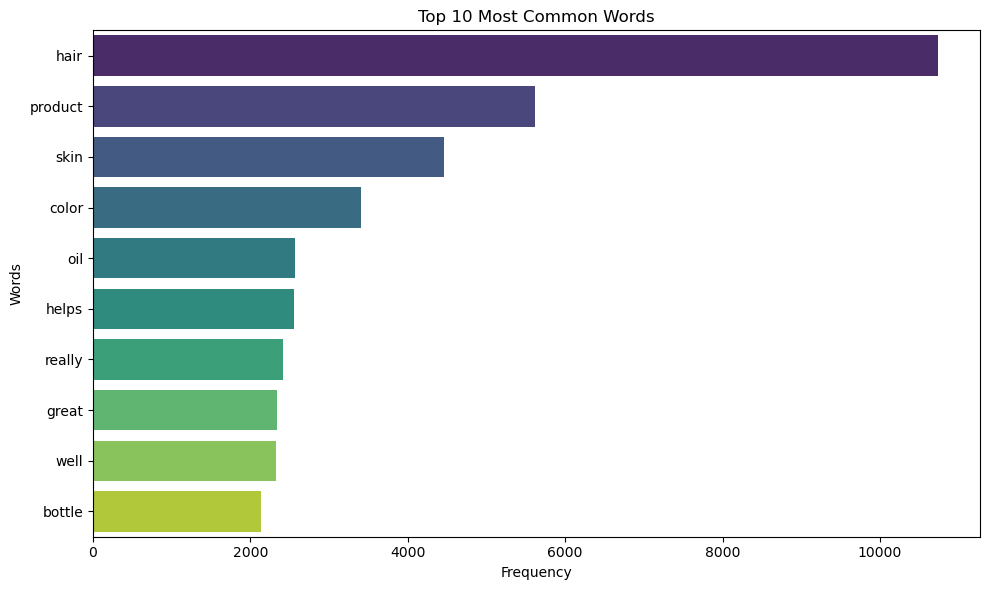

In [25]:
# Extract words and their counts separately
words = [pair[0] for pair in top_10_words]
counts = [pair[1] for pair in top_10_words]

# Plotting the bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Common Words')
plt.tight_layout()

# Show the plot
plt.show()

### NLP technique: WordCloud

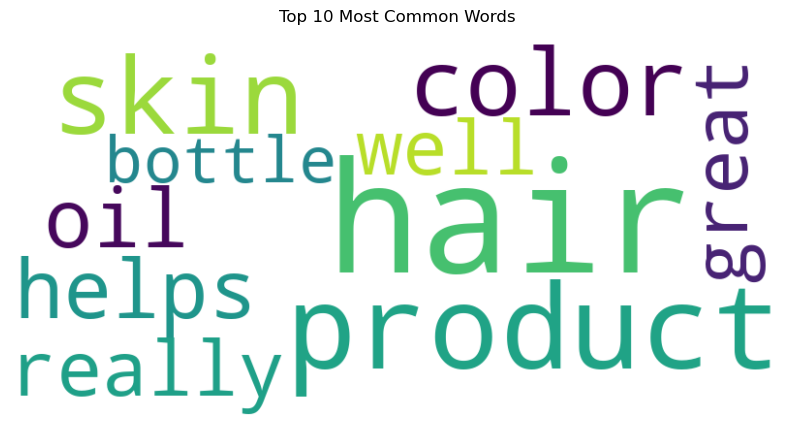

In [26]:
# Generate a dictionary with words and their frequencies
word_freq = {word: freq for word, freq in top_10_words}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Most Common Words')
plt.show()

### NLP technique: Named Entity Recognition (NER) tags

In [33]:
# Load spaCy model 
nlp = spacy.load("en_core_web_sm")

# Function to chunk text 
def chunk_text(text, chunk_size=10000):
    return [text[i:i + chunk_size] for i in range(0, len(text),chunk_size)]

# Combine lines into a single string 
text_subset = '\n'.join(answers)

all_entities =[]

for chunk in chunk_text(text_subset): 
    doc = nlp(chunk) 
    all_entities.extend([(ent.text, ent.label_) for ent in doc.ents])
    
# Combine entities 
entities = all_entities

print(entities)

[('2 inches', 'QUANTITY'), ('one', 'CARDINAL'), ('4', 'CARDINAL'), ('12 inches', 'QUANTITY'), ('4 inches', 'QUANTITY'), ('the 12 inch', 'QUANTITY'), ('el paquete', 'ORG'), ('a minute', 'TIME'), ('two', 'CARDINAL'), ('three', 'CARDINAL'), ('four', 'CARDINAL'), ('overnight', 'TIME'), ('the next day', 'DATE'), ('almost a year', 'DATE'), ('four', 'CARDINAL'), ('4', 'CARDINAL'), ('five', 'CARDINAL'), ('2', 'CARDINAL'), ('3', 'CARDINAL'), ('5.30', 'MONEY'), ('24 hours', 'TIME'), ('3rd', 'ORDINAL'), ('3', 'CARDINAL'), ('10 years', 'DATE'), ('one', 'CARDINAL'), ('12', 'CARDINAL'), ('years', 'DATE'), ('3.8', 'CARDINAL'), ('9 x 11 inches', 'QUANTITY'), ('1 pounds', 'QUANTITY'), ('four', 'CARDINAL'), ('european', 'NORP'), ('one', 'CARDINAL'), ('five dollars', 'MONEY'), ('k-mart', 'ORG'), ('9.99', 'MONEY'), ('2', 'CARDINAL'), ('110', 'CARDINAL'), ('25', 'CARDINAL'), ("paul mitchell's", 'PERSON'), ('12', 'CARDINAL'), ('one', 'CARDINAL'), ('2', 'CARDINAL'), ('may 2013', 'DATE'), ('25 degrees', 'QUAN

The results from the Named Entity Recognition (NER) analysis offer valuable insights into the dataset by identifying and categorizing key entities within the text. By reviewing the results, we can see that "CARDINAL" is a common tag, representing numerical values. Another frequent tag is "PERSON," which often pertains to brands. This information can help analyze which brands are mentioned most frequently.

### NLP techniques: Stemming and Lemmatization

In [40]:
from nltk.stem import PorterStemmer 
# Initialize SpaCy's English model
nlp = spacy.load('en_core_web_sm')

# Import the Porter Stemmer from NLTK
stemmer = PorterStemmer()

# Perform stemming on the top 10 words
stemmed_words = [stemmer.stem(word[0]) for word in top_10_words]

# Print the stemmed words
print(stemmed_words)

# Re-initialize SpaCy's English model (redundant as it's already initialized above)
nlp = spacy.load('en_core_web_sm')

# Perform lemmatization using SpaCy on the top 10 words
lemmatized_words = [nlp(word[0])[0].lemma_ for word in top_10_words]

# Print the lemmatized words
print(lemmatized_words)

['hair', 'product', 'skin', 'color', 'oil', 'help', 'realli', 'great', 'well', 'bottl']
['hair', 'product', 'skin', 'color', 'oil', 'help', 'really', 'great', 'well', 'bottle']


Stemming results: ['hair', 'product', 'skin', 'color', 'oil', 'help', 'realli', 'great', 'well', 'bottl']

Notice how really becomes realli and bottle becomes bottl due to the basic chopping off of characters.

Lemmatization results: ['hair', 'product', 'skin', 'color', 'oil', 'help', 'really', 'great', 'well', 'bottle']

The words retain their meaningful forms,  really and bottle remain unchanged.

In essence, stemming may sometimes produce non-dictionary forms (ex: bottl), while lemmatization produces actual words by considering the context and morphological analysis.

In [31]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
# Analyze sentiment for questions and answers
question_sentiments = [analyze_sentiment(question) for question in questions] 
answer_sentiments = [analyze_sentiment(answer) for answer in answers]

# Print sentiment analysis results
for i in range(len(questions)):
    print(f"Question: {questions[i]}")
    print(f"Sentiment: {'Positive' if question_sentiments[i] > 0 else 'Negative' if question_sentiments[i] < 0 else 'Neutral'}")
    print(f"Answer: {answers[i]}")
    print(f"Sentiment: {'Positive' if answer_sentiments[i] > 0 else 'Negative' if answer_sentiments[i] < 0 else 'Neutral'}")
    print("-" * 20)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




--------------------------------------------------
Question: ok, i'm not pregnant, i'm only 18 but i have a lot of stretch marks, a lot &amp; i feel terrible.. can my stretch marks go away with this?
Sentiment: Negative
Answer: this product has a blend of ingredients that nourishes and moisturizes skin, and people have used it to prevent/reduce stretch marks. you can certainly try it out and see if it works for you. there are a lot of different remedies out there and certain things work for certain people. it's best to speak with your physician and see what he or she recommends. ps: i know it's hard, but try not to feel terrible about your stretch marks. a lot of people get them - including me. :) www.top10homeremedies.com/how-to/how-to-get-rid-of-stretch-marks-fast.html www.wikihow.com/get-rid-of-stretch-marks
Sentiment: Positive
--------------------------------------------------
Question: why does this product have to contain magnesium aluminum silicate ?
Sentiment: Neutral
Answer: 

### Sentiment Analysis

In [35]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

question_sentiments = [analyze_sentiment(question) for question in questions]
answer_sentiments = [analyze_sentiment(answer) for answer in answers]

average_question_sentiment = sum(question_sentiments) / len(question_sentiments) 
average_answer_sentiment = sum(answer_sentiments) / len(answer_sentiments)

print(f"Average Question Sentiment: {'Positive' if average_question_sentiment > 0 else 'Negative' if average_question_sentiment < 0 else 'Neutral'}") 
print(f"Average Answer Sentiment: {'Positive' if average_answer_sentiment > 0 else 'Negative' if average_answer_sentiment < 0 else 'Neutral'}")

Average Question Sentiment: Positive
Average Answer Sentiment: Positive


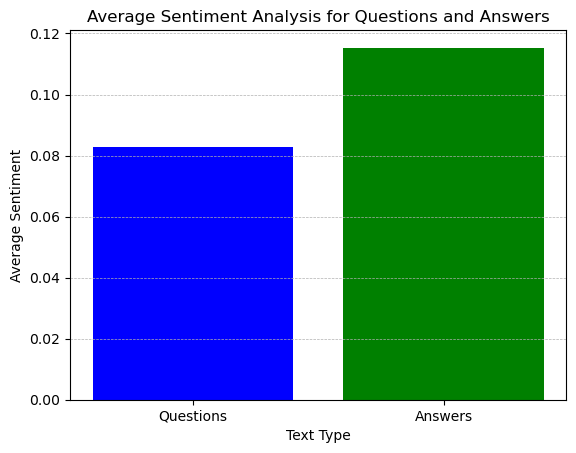

In [38]:
labels = ['Questions', 'Answers']
average_sentiments = [average_question_sentiment, average_answer_sentiment]

plt.bar(labels, average_sentiments, color=['blue', 'green']) 
plt.xlabel('Text Type')
plt.ylabel('Average Sentiment') 
plt.title('Average Sentiment Analysis for Questions and Answers')
plt.grid(axis='y', linestyle='--', linewidth=0.5) 
plt.show()

### Conclusion of Analysis 

Based on the sentiment analysis results and the bar chart, we can draw the following conclusions:

Overall Sentiment:
The average sentiment score for both questions and answers is positive. This indicates that the overall tone of the interactions in the dataset is generally positive.

Comparison of Sentiments:
The average sentiment score for answers is higher than that for questions. This suggests that the responses provided in the dataset tend to be more positive compared to the questions asked.

User Experience:
The positive sentiment in answers could imply that the responses are helpful, reassuring, or satisfactory to the users. This is a good sign for customer support or product-related queries, as it indicates a positive user experience.

While the overall sentiment is positive, there might still be room for improvement in addressing user concerns or questions more effectively to further enhance the sentiment of the interactions.
These conclusions can help in understanding the general tone and effectiveness of the interactions in the dataset, and can guide improvements in customer support or product-related communication. 

In summary, the dataset indicates a strong interest in beauty and skincare products, with customers generally expressing positive sentiments. The insights can guide product development, marketing strategies, and customer support enhancements.
